In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing general libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import random
import cv2

# Importing deep learning libraries
import keras
import keras.backend as K
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing import image
import tensorflow as tf
%matplotlib inline

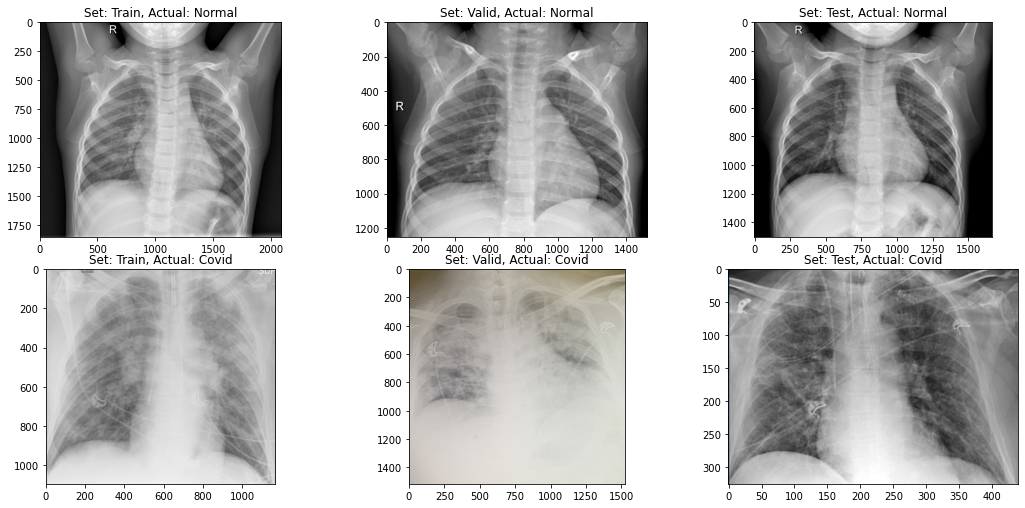

In [0]:
input_path = '/content/drive/My Drive/ML-Assignment-4/Dataset/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['Train', 'Valid', 'Test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/Normal/'+os.listdir(set_path+'/Normal')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Actual: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/Covid/'+os.listdir(set_path+'/Covid')[2]), cmap='gray')
    ax[i+3].set_title('Set: {}, Actual: Covid'.format(_set))

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)       

In [0]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/ML-Assignment-4/Dataset/Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 280 images belonging to 2 classes.


In [0]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/My Drive/ML-Assignment-4/Dataset/Valid',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 80 images belonging to 2 classes.


In [0]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

Epoch 1/10
8/8 [==============================] - 139s 17s/step - loss: 1.4105 - accuracy: 0.5000 - val_loss: 0.6820 - val_accuracy: 0.5469
Epoch 2/10
8/8 [==============================] - 26s 3s/step - loss: 0.6936 - accuracy: 0.5234 - val_loss: 0.6913 - val_accuracy: 0.4167
Epoch 3/10
8/8 [==============================] - 8s 990ms/step - loss: 0.6549 - accuracy: 0.5565 - val_loss: 0.6221 - val_accuracy: 0.6667
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.4982 - accuracy: 0.7581 - val_loss: 0.2771 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.3839 - accuracy: 0.8468 - val_loss: 0.3863 - val_accuracy: 0.9792
Epoch 6/10
8/8 [==============================] - 8s 939ms/step - loss: 0.3104 - accuracy: 0.8992 - val_loss: 0.2399 - val_accuracy: 0.9375
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.1952 - accuracy: 0.9476 - val_loss: 0.1426 - val_accuracy: 0.9688
Epoch 8/10
8/8 [=============

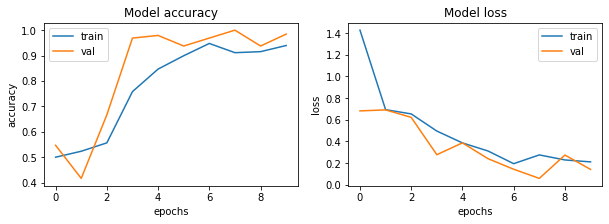

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])